In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ultralytics

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12

In [2]:
!pip install --upgrade torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8

Importing libraires

In [2]:
import os
import yaml
import torch
from ultralytics import YOLO
from pathlib import Path
import re
import matplotlib.pyplot as plt
from torchvision.ops import box_iou
import torch.nn as nn
import torch.nn.functional as F

### PRESETTING

In [3]:
#setting the pathes and the yaml file
images_dir = '/content/drive/MyDrive/data_(1)/augmented_train/images'
labels_dir = '/content/drive/MyDrive/data_(1)/augmented_train/labels'
data_yaml_path = 'climbing_data.yaml'
output_dir = '/content/drive/MyDrive/climbing_holds_model'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


print(f"Images directory exists: {os.path.exists(images_dir)}")
print(f"Labels directory exists: {os.path.exists(labels_dir)}")

Images directory exists: True
Labels directory exists: True


In [4]:
# Create YOLO data configuration
dataset_info = {
    'train': images_dir,
    'val': images_dir,
    'nc': 1,
    'names': ['climbing_hold']
}

with open(data_yaml_path, 'w') as file:
    yaml.dump(dataset_info, file)


### YOLO FINE TUNING

In [ ]:
model = YOLO('/content/drive/MyDrive/climbing_holds_model/climbing_holds/weights/PACTEv1.pt') #This is a previous version of our model originally trained on yolo11n.pt (100 epochs)

results = model.train(
    data=data_yaml_path,
    epochs=100,
    save=True,
    project=output_dir,
    name='climbing_holds',
    device=device
)

model.save('climbing_holds_model.pt')


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=climbing_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/climbing_holds_model/climbing_holds/weights/PACTEv1.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=climbing_holds2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

train: Scanning /content/drive/.shortcut-targets-by-id/1YGloMA9P_dI6gWHyFkJ2CocDKF1B4ihU/data/augmented_train/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 7.3±14.5 ms, read: 9.0±14.5 MB/s, size: 61.7 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1YGloMA9P_dI6gWHyFkJ2CocDKF1B4ihU/data/augmented_train/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/climbing_holds_model/climbing_holds2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/climbing_holds_model/climbing_holds2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.44G      1.618      1.066       1.04        230        640: 100%|██████████| 62/62 [00:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.61it/s]


                   all        990      16678      0.895      0.624      0.708      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.44G      1.681      1.099      1.059        247        640: 100%|██████████| 62/62 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.54it/s]


                   all        990      16678      0.871      0.609      0.692      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.44G      1.696      1.118      1.062        266        640: 100%|██████████| 62/62 [00:20<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.879      0.602      0.687      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.44G      1.738      1.163       1.08        221        640: 100%|██████████| 62/62 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


                   all        990      16678      0.872      0.599      0.684      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.44G      1.714      1.129      1.077        242        640: 100%|██████████| 62/62 [00:20<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


                   all        990      16678      0.884      0.594      0.683        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.44G      1.718      1.134      1.078        208        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.76it/s]


                   all        990      16678      0.863      0.593      0.679      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.44G      1.714      1.148      1.077        344        640: 100%|██████████| 62/62 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]


                   all        990      16678      0.876      0.586      0.678      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.44G      1.735      1.142      1.083        448        640: 100%|██████████| 62/62 [00:20<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.55it/s]


                   all        990      16678       0.87      0.593       0.68      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.44G      1.735      1.151      1.087        302        640: 100%|██████████| 62/62 [00:21<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.55it/s]


                   all        990      16678      0.876      0.596      0.683      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.44G      1.741      1.154      1.071        254        640: 100%|██████████| 62/62 [00:20<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.43it/s]


                   all        990      16678      0.866      0.601      0.681      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.44G      1.728      1.154      1.077        241        640: 100%|██████████| 62/62 [00:22<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.47it/s]


                   all        990      16678      0.879      0.604      0.689      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.44G      1.732      1.145      1.071        334        640: 100%|██████████| 62/62 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.53it/s]


                   all        990      16678      0.878      0.606       0.69        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.44G      1.735      1.151      1.078        299        640: 100%|██████████| 62/62 [00:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.67it/s]


                   all        990      16678      0.883      0.608      0.694       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.44G       1.71      1.155      1.071        397        640: 100%|██████████| 62/62 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.48it/s]


                   all        990      16678      0.887      0.605      0.694       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.44G      1.748      1.154      1.075        334        640: 100%|██████████| 62/62 [00:22<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.74it/s]


                   all        990      16678      0.876        0.6      0.687      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.44G      1.708      1.128       1.07        382        640: 100%|██████████| 62/62 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.45it/s]


                   all        990      16678      0.888      0.607      0.695      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.44G      1.698      1.123      1.069        417        640: 100%|██████████| 62/62 [00:21<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.65it/s]


                   all        990      16678      0.894      0.609      0.698      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.44G      1.682      1.102      1.063        362        640: 100%|██████████| 62/62 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.45it/s]


                   all        990      16678      0.879       0.61      0.695      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.44G      1.654      1.092      1.056        318        640: 100%|██████████| 62/62 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.40it/s]


                   all        990      16678      0.897      0.612      0.699      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.44G      1.677      1.103      1.056        346        640: 100%|██████████| 62/62 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.40it/s]


                   all        990      16678      0.891      0.611      0.699      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.44G      1.665      1.094      1.053        328        640: 100%|██████████| 62/62 [00:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.67it/s]


                   all        990      16678      0.889      0.598      0.687      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.44G      1.675      1.094      1.062        259        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.889      0.615      0.702      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.44G      1.661      1.086      1.057        297        640: 100%|██████████| 62/62 [00:20<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.886      0.623      0.706      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.44G      1.676      1.101      1.059        232        640: 100%|██████████| 62/62 [00:22<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.50it/s]


                   all        990      16678      0.884      0.614        0.7      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.44G       1.64      1.075      1.049        323        640: 100%|██████████| 62/62 [00:20<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.888      0.607      0.695      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.44G      1.643      1.066      1.047        274        640: 100%|██████████| 62/62 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.58it/s]


                   all        990      16678      0.895       0.62      0.707      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.44G      1.653      1.084      1.049        441        640: 100%|██████████| 62/62 [00:20<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.58it/s]


                   all        990      16678      0.892      0.622      0.709      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.44G      1.625      1.057       1.05        149        640: 100%|██████████| 62/62 [00:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.45it/s]


                   all        990      16678      0.896      0.618      0.709      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.44G      1.627      1.069      1.048        520        640: 100%|██████████| 62/62 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]


                   all        990      16678      0.892      0.617      0.708      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.44G      1.661      1.084      1.054        306        640: 100%|██████████| 62/62 [00:22<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.60it/s]


                   all        990      16678      0.892      0.622      0.711      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.44G      1.619       1.05       1.05        457        640: 100%|██████████| 62/62 [00:20<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.41it/s]


                   all        990      16678      0.887      0.625      0.711      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.44G      1.616      1.055      1.042        302        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.41it/s]


                   all        990      16678      0.903      0.625      0.714       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.44G      1.621      1.064      1.049        357        640: 100%|██████████| 62/62 [00:20<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.47it/s]


                   all        990      16678      0.902      0.623      0.713      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.44G      1.583      1.032      1.034        439        640: 100%|██████████| 62/62 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.49it/s]


                   all        990      16678      0.895       0.63      0.717      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.44G      1.602      1.038      1.039        275        640: 100%|██████████| 62/62 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.69it/s]


                   all        990      16678      0.908       0.63      0.716      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.44G      1.589      1.038      1.029        281        640: 100%|██████████| 62/62 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.50it/s]


                   all        990      16678      0.901      0.624      0.716       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.44G      1.596      1.034      1.044        264        640: 100%|██████████| 62/62 [00:22<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.80it/s]


                   all        990      16678        0.9       0.63      0.717      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.44G      1.607       1.05      1.046        228        640: 100%|██████████| 62/62 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.48it/s]


                   all        990      16678        0.9      0.631      0.718      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.44G      1.595      1.027      1.036        340        640: 100%|██████████| 62/62 [00:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.81it/s]


                   all        990      16678      0.905      0.636      0.721      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.44G      1.604      1.042      1.044        286        640: 100%|██████████| 62/62 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.50it/s]


                   all        990      16678      0.902      0.631      0.722      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.44G      1.582       1.03      1.032        272        640: 100%|██████████| 62/62 [00:22<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.66it/s]


                   all        990      16678       0.91      0.625      0.718       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.44G      1.594      1.031      1.033        255        640: 100%|██████████| 62/62 [00:20<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.42it/s]


                   all        990      16678        0.9      0.637      0.727      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.44G      1.596      1.038      1.039        313        640: 100%|██████████| 62/62 [00:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.48it/s]


                   all        990      16678      0.898      0.636      0.725      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.44G      1.581      1.014      1.026        289        640: 100%|██████████| 62/62 [00:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.48it/s]


                   all        990      16678      0.907      0.635      0.726      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.44G      1.555     0.9949       1.03        233        640: 100%|██████████| 62/62 [00:22<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]


                   all        990      16678      0.904      0.634      0.722      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.44G      1.567      1.013      1.035        176        640: 100%|██████████| 62/62 [00:20<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.40it/s]


                   all        990      16678      0.906      0.637      0.728      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.44G      1.574      1.004      1.028        334        640: 100%|██████████| 62/62 [00:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.67it/s]


                   all        990      16678      0.917      0.636      0.728      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.44G       1.56      1.003      1.022        292        640: 100%|██████████| 62/62 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.904      0.641      0.726      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.44G      1.576      1.016      1.026        336        640: 100%|██████████| 62/62 [00:22<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.60it/s]


                   all        990      16678       0.91      0.641      0.728      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.44G      1.562      1.008      1.027        336        640: 100%|██████████| 62/62 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


                   all        990      16678      0.907      0.648      0.732      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.44G      1.541     0.9907      1.014        323        640: 100%|██████████| 62/62 [00:22<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.53it/s]


                   all        990      16678      0.912      0.643      0.734      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.44G      1.551     0.9877      1.021        241        640: 100%|██████████| 62/62 [00:21<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.72it/s]


                   all        990      16678      0.903       0.65      0.735      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.44G      1.545     0.9902      1.022        294        640: 100%|██████████| 62/62 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


                   all        990      16678      0.911      0.647      0.735      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.44G       1.53     0.9802      1.023        279        640: 100%|██████████| 62/62 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.62it/s]


                   all        990      16678       0.91      0.648      0.735      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.44G      1.552      1.002      1.028        228        640: 100%|██████████| 62/62 [00:20<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.40it/s]


                   all        990      16678      0.906      0.649      0.734      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.44G      1.532     0.9728      1.017        388        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.44it/s]


                   all        990      16678      0.913      0.646      0.733      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.44G      1.517     0.9743      1.019        270        640: 100%|██████████| 62/62 [00:20<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.48it/s]


                   all        990      16678      0.913      0.651      0.738       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.44G      1.526     0.9728      1.015        295        640: 100%|██████████| 62/62 [00:21<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.48it/s]


                   all        990      16678       0.91      0.654       0.74      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.44G      1.545     0.9829      1.023        449        640: 100%|██████████| 62/62 [00:20<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.50it/s]


                   all        990      16678      0.905      0.651      0.736      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.44G      1.525     0.9684      1.017        306        640: 100%|██████████| 62/62 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


                   all        990      16678      0.918      0.653       0.74      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.44G      1.484     0.9498      1.007        281        640: 100%|██████████| 62/62 [00:20<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.913      0.657      0.744      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.44G      1.539     0.9735       1.02        331        640: 100%|██████████| 62/62 [00:22<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.58it/s]


                   all        990      16678      0.913      0.661      0.745      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.44G      1.518      0.963       1.01        449        640: 100%|██████████| 62/62 [00:21<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.54it/s]


                   all        990      16678      0.921      0.658      0.744      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.44G      1.505     0.9672      1.016        275        640: 100%|██████████| 62/62 [00:22<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


                   all        990      16678      0.915      0.659      0.745      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.44G      1.518     0.9625      1.013        279        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.87it/s]


                   all        990      16678      0.917      0.655      0.744      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.44G      1.516     0.9651      1.014        341        640: 100%|██████████| 62/62 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.58it/s]


                   all        990      16678      0.917      0.664      0.747      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.44G      1.483     0.9533      1.004        353        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.82it/s]


                   all        990      16678      0.913       0.66      0.744      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.44G      1.506     0.9476      1.013        350        640: 100%|██████████| 62/62 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.46it/s]


                   all        990      16678      0.919      0.662      0.748      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.44G      1.487     0.9471      1.003        288        640: 100%|██████████| 62/62 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.46it/s]


                   all        990      16678      0.923      0.659      0.747      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.44G      1.484     0.9403      1.008        244        640: 100%|██████████| 62/62 [00:20<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.46it/s]


                   all        990      16678       0.92      0.664       0.75      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.44G      1.477     0.9475      1.008        272        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.40it/s]


                   all        990      16678       0.92      0.661      0.748      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.44G      1.452     0.9138     0.9944        237        640: 100%|██████████| 62/62 [00:20<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]


                   all        990      16678      0.921      0.663      0.751      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.44G      1.465     0.9265     0.9997        247        640: 100%|██████████| 62/62 [00:22<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.61it/s]


                   all        990      16678      0.922      0.663       0.75      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.44G      1.467     0.9272          1        275        640: 100%|██████████| 62/62 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.59it/s]


                   all        990      16678      0.914      0.668      0.752      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.44G      1.472     0.9353      1.002        379        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.61it/s]


                   all        990      16678      0.917       0.67      0.753      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.44G      1.466     0.9379     0.9988        275        640: 100%|██████████| 62/62 [00:21<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.58it/s]


                   all        990      16678      0.919       0.67      0.753        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.44G      1.442     0.9102     0.9943        240        640: 100%|██████████| 62/62 [00:22<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.54it/s]


                   all        990      16678      0.917      0.671      0.754      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.44G      1.463     0.9264          1        361        640: 100%|██████████| 62/62 [00:20<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.53it/s]


                   all        990      16678      0.924      0.667      0.754      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.44G      1.481     0.9367     0.9986        265        640: 100%|██████████| 62/62 [00:22<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.61it/s]


                   all        990      16678      0.908      0.671      0.753      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.44G      1.462     0.9276     0.9976        248        640: 100%|██████████| 62/62 [00:20<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.52it/s]


                   all        990      16678      0.918      0.673      0.757      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.44G      1.436     0.9143     0.9928        224        640: 100%|██████████| 62/62 [00:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.921       0.67      0.755      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.44G      1.443     0.9066     0.9903        288        640: 100%|██████████| 62/62 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.72it/s]


                   all        990      16678      0.923      0.673      0.757      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.44G      1.454     0.9207      1.001        363        640: 100%|██████████| 62/62 [00:21<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.43it/s]


                   all        990      16678      0.923      0.673      0.757       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.44G      1.436     0.9072     0.9949        351        640: 100%|██████████| 62/62 [00:22<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.46it/s]


                   all        990      16678      0.918      0.675      0.757       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.44G      1.416     0.9042      0.986        423        640: 100%|██████████| 62/62 [00:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.54it/s]


                   all        990      16678      0.921      0.675      0.759      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.44G      1.426     0.9004     0.9928        301        640: 100%|██████████| 62/62 [00:21<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.43it/s]


                   all        990      16678      0.922      0.675      0.759      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.44G      1.451     0.9086     0.9909        383        640: 100%|██████████| 62/62 [00:21<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.65it/s]


                   all        990      16678      0.921      0.671      0.755      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.44G      1.426     0.9057     0.9861        266        640: 100%|██████████| 62/62 [00:21<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.922      0.674      0.759      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.44G      1.423     0.9001     0.9884        300        640: 100%|██████████| 62/62 [00:21<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.85it/s]


                   all        990      16678      0.923      0.672      0.758      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.44G       1.42      0.886     0.9859        336        640: 100%|██████████| 62/62 [00:21<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.56it/s]


                   all        990      16678      0.924      0.677       0.76      0.516
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.44G       1.38     0.8666      0.991        268        640: 100%|██████████| 62/62 [00:22<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.53it/s]


                   all        990      16678      0.924      0.674      0.759      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.44G      1.397     0.8708     0.9982        263        640: 100%|██████████| 62/62 [00:19<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.48it/s]


                   all        990      16678      0.921      0.674      0.758      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.44G      1.363     0.8548     0.9891        189        640: 100%|██████████| 62/62 [00:19<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.69it/s]

                   all        990      16678      0.924      0.677       0.76      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.44G       1.36     0.8559     0.9888        165        640: 100%|██████████| 62/62 [00:20<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.58it/s]


                   all        990      16678      0.929      0.677      0.761      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.44G      1.339     0.8379     0.9806        208        640: 100%|██████████| 62/62 [00:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.60it/s]

                   all        990      16678      0.927      0.678      0.762      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.44G      1.355      0.854     0.9894        229        640: 100%|██████████| 62/62 [00:20<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.67it/s]


                   all        990      16678      0.931      0.677      0.763      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.44G       1.34     0.8368     0.9835        212        640: 100%|██████████| 62/62 [00:21<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:12<00:00,  2.57it/s]


                   all        990      16678      0.921      0.679      0.762      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.44G      1.308      0.816     0.9711        269        640: 100%|██████████| 62/62 [00:19<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.60it/s]


                   all        990      16678      0.924      0.681      0.764      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.44G      1.327     0.8346     0.9809        174        640: 100%|██████████| 62/62 [00:20<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.84it/s]


                   all        990      16678      0.927      0.678      0.764      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.44G      1.311     0.8225     0.9738        169        640: 100%|██████████| 62/62 [00:20<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:11<00:00,  2.60it/s]


                   all        990      16678      0.928       0.68      0.764      0.526

100 epochs completed in 0.976 hours.
Optimizer stripped from /content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]


                   all        990      16678      0.927      0.679      0.764      0.526
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/drive/MyDrive/climbing_holds_model/climbing_holds2


LABEL SMOOTHING AND BOX INTERSECTIONS REMOVING

In [ ]:
def load_yolo_model(model_path):
    """
    Load YOLO model from .pt file
    """
    try:
        model = torch.load(model_path, map_location=torch.device('cpu'))
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None


def check_yolov11_version(model):
    """
    Check if model is YOLOv11 or newer
    """
    if isinstance(model, dict):
        if 'model' in model and hasattr(model['model'], 'yaml'):
            if 'yaml_file' in model['model'].yaml:
                if re.search(r'v11', model['model'].yaml['yaml_file'].lower()):
                    return True
        if 'version' in model:
            version_str = str(model['version'])
            if re.search(r'v11', version_str, re.IGNORECASE):
                return True
    else:
        if hasattr(model, 'yaml'):
            if hasattr(model.yaml, 'yaml_file') and re.search(r'v11', model.yaml.yaml_file.lower()):
                return True
        if hasattr(model, 'model') and hasattr(model.model, 'model'):
            return True
        if hasattr(model, 'version'):
            if re.search(r'v11', str(model.version), re.IGNORECASE):
                return True
        if hasattr(model, 'name') and isinstance(model.name, str):
            if re.search(r'yolov11n|yolo11n', model.name, re.IGNORECASE):
                return True
        if hasattr(model, 'model') and hasattr(model.model, 'name'):
            if re.search(r'yolov11n|yolo11n', model.model.name, re.IGNORECASE):
                return True
        if hasattr(model, 'args') and isinstance(model.args, dict):
            if 'model' in model.args and re.search(r'yolov11n|yolo11n', model.args['model'], re.IGNORECASE):
                return True
    return False



In [ ]:
def add_custom_nms(model, iou_threshold=0.2):
    """
    Add custom NMS (Non-Maximum Suppression) with fixed IoU threshold
    """
    if isinstance(model, dict):
        model.setdefault('args', {})
        model['args']['conf_thres'] = max(model['args'].get('conf_thres', 0.25), 0.25)
        model['args']['iou_thres'] = iou_threshold
    else:
        if not hasattr(model, 'args'):
            model.args = {}
        if hasattr(model, 'conf'):
            model.conf = max(model.conf, 0.25)
        if hasattr(model, 'iou'):
            model.iou = iou_threshold
        else:
            model.args['iou_thres'] = iou_threshold
    return model


def add_label_smoothing(model, smoothing_factor=0.1):
    """
    Add label smoothing to model
    """
    if isinstance(model, dict):
        model.setdefault('hyp', {})
        model['hyp']['label_smoothing'] = smoothing_factor
    else:
        if not hasattr(model, 'hyp'):
            model.hyp = {}
        if hasattr(model, 'model') and hasattr(model.model, 'hyp'):
            model.model.hyp['label_smoothing'] = smoothing_factor
        elif hasattr(model, 'train_args'):
            model.train_args['label_smoothing'] = smoothing_factor
        else:
            model.hyp['label_smoothing'] = smoothing_factor
    return model


In [ ]:
def update_model_version(model):
    """
    Update model version to reflect enhancements
    """
    if isinstance(model, dict):
        if 'version' in model:
            model['version'] = f"{model['version']}-enhanced-ls"
        else:
            model['version'] = "YOLOv11n-enhanced-ls"
    else:
        if hasattr(model, 'version'):
            model.version = f"{model.version}-enhanced-ls"
        elif hasattr(model, 'model') and hasattr(model.model, 'version'):
            model.model.version = f"{model.model.version}-enhanced-ls"
        elif hasattr(model, 'name'):
            model.name = f"{model.name}-enhanced-ls"
        elif hasattr(model, 'model') and hasattr(model.model, 'name'):
            model.model.name = f"{model.model.name}-enhanced-ls"
        else:
            model.version = "YOLOv11n-enhanced-ls"
    return model


In [ ]:
def enhance_yolov11_model(input_model_path, output_model_path, iou_threshold, smoothing_factor):
    """
    Main function to enhance YOLOv11 models:
    1. Custom NMS
    2. Label smoothing
    3. Version tag update
    """
    print(f"Loading model from {input_model_path}...")
    model = load_yolo_model(input_model_path)
    if model is None:
        print("ERROR: Failed to load model.")
        return None

    yolov8_compatible = False
    if isinstance(model, dict) and 'version' in model:
        if re.search(r'v8|v9|v10', str(model['version']).lower()):
            yolov8_compatible = True
    elif hasattr(model, 'version'):
        if re.search(r'v8|v9|v10', str(model.version).lower()):
            yolov8_compatible = True

    if not check_yolov11_version(model) and not yolov8_compatible:
        print("Non YOLOv11 or YOLOv8+ model detected. Applying generic enhancement...")
    else:
        print("Compatible YOLO model detected.")

    print("Applying enhancements...")
    model = add_custom_nms(model, iou_threshold)
    model = add_label_smoothing(model, smoothing_factor)
    model = update_model_version(model)

    print(f"Saving enhanced model to {output_model_path}...")
    torch.save(model, output_model_path)
    print("Model saved successfully.")
    return output_model_path


In [ ]:
#We use the weigths we obtained from training and add to them custom enhancement to make the model more effective
input_path = "/content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/best.pt"
output_path = "/content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/PACTEv2.pt"
print(f"Input model path exists: {os.path.exists(input_path)}")
enhance_yolov11_model(input_path, output_path, iou_threshold=0.2, smoothing_factor=0.1)


Input model path exists: True
Loading model from /content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/best.pt...
Non YOLOv11 or YOLOv8+ model detected. Applying generic enhancement...
Applying enhancements...
Saving enhanced model to /content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/PACTEv2.pt...
Model saved successfully.


'/content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/PACTEv2.pt'

CUSTOM LOSS FUNCTION

$$
GripLoss=λ
cls
​
 ∗FocalLoss+λ
loc
​
 ∗(CIoU+EdgeAlign)+λ
obj
​
 ∗ObjFocal
$$

In [5]:
class GripLoss(nn.Module):
    """
    Custom loss function for climbing hold detection.

    Combines:
      - Focal loss for classification.
      - CIoU loss for bounding box regression (overlap, center distance, aspect ratio).
      - Edge alignment loss: encourages boxes to align with strong image gradients (edges).
    """
    def __init__(self, lambda_cls=0.5, lambda_loc=2.5, lambda_obj=1.0, gamma=2.0):
        super(GripLoss, self).__init__()
        self.lambda_cls = lambda_cls    # Weight for classification loss
        self.lambda_loc = lambda_loc    # Weight for localization loss
        self.lambda_obj = lambda_obj    # Weight for objectness loss
        self.gamma = gamma              # Focusing parameter for focal loss
        self.bce = nn.BCEWithLogitsLoss(reduction='none')

    def focal_loss(self, pred, target, alpha=0.25):
        """
        Focal loss: down-weights easy examples, focuses on hard ones.
        Args:
            pred: predicted logits [B, N, C]
            target: ground truth labels [B, N, C]
            alpha: class balance weight
        Returns:
            scalar loss
        """
        bce_loss = self.bce(pred, target)
        pt = torch.exp(-bce_loss)
        focal = alpha * (1 - pt) ** self.gamma * bce_loss
        return focal.mean()

    def ciou_loss(self, pred_boxes, target_boxes):
        """
        Complete IoU loss: combines IoU, center distance, and aspect ratio.
        Args:
            pred_boxes, target_boxes: [B, N, 4] in (x1, y1, x2, y2)
        Returns:
            scalar loss
        """
        eps = 1e-7
        x1 = torch.max(pred_boxes[..., 0], target_boxes[..., 0])
        y1 = torch.max(pred_boxes[..., 1], target_boxes[..., 1])
        x2 = torch.min(pred_boxes[..., 2], target_boxes[..., 2])
        y2 = torch.min(pred_boxes[..., 3], target_boxes[..., 3])

        inter = (x2 - x1).clamp(min=0) * (y2 - y1).clamp(min=0)
        area_pred = (pred_boxes[..., 2] - pred_boxes[..., 0]) * (pred_boxes[..., 3] - pred_boxes[..., 1])
        area_gt = (target_boxes[..., 2] - target_boxes[..., 0]) * (target_boxes[..., 3] - target_boxes[..., 1])
        union = area_pred + area_gt - inter + eps

        iou = inter / union

        # Center distance
        px = (pred_boxes[..., 0] + pred_boxes[..., 2]) / 2
        py = (pred_boxes[..., 1] + pred_boxes[..., 3]) / 2
        gx = (target_boxes[..., 0] + target_boxes[..., 2]) / 2
        gy = (target_boxes[..., 1] + target_boxes[..., 3]) / 2
        center_dist = (px - gx) ** 2 + (py - gy) ** 2

        # Enclosing box diagonal
        c_x1 = torch.min(pred_boxes[..., 0], target_boxes[..., 0])
        c_y1 = torch.min(pred_boxes[..., 1], target_boxes[..., 1])
        c_x2 = torch.max(pred_boxes[..., 2], target_boxes[..., 2])
        c_y2 = torch.max(pred_boxes[..., 3], target_boxes[..., 3])
        c_diag = (c_x2 - c_x1) ** 2 + (c_y2 - c_y1) ** 2 + eps

        # Aspect ratio consistency
        ar_pred = (pred_boxes[..., 2] - pred_boxes[..., 0]) / (pred_boxes[..., 3] - pred_boxes[..., 1] + eps)
        ar_gt = (target_boxes[..., 2] - target_boxes[..., 0]) / (target_boxes[..., 3] - target_boxes[..., 1] + eps)
        v = (4 / (torch.pi ** 2)) * torch.pow(torch.atan(ar_gt) - torch.atan(ar_pred), 2)

        with torch.no_grad():
            alpha = v / (1 - iou + v + eps)

        ciou = iou - (center_dist / c_diag + alpha * v)
        return 1 - ciou.mean()

    def sobel(self, img):
        """
        Manual Sobel filter using convolution.
        Args:
            img: [B, 1, H, W] grayscale image tensor
        Returns:
            edge map: [B, 1, H, W]
        """
        sobel_x = torch.tensor([[[-1, 0, 1],
                                 [-2, 0, 2],
                                 [-1, 0, 1]]], dtype=torch.float32, device=img.device)
        sobel_y = torch.tensor([[[-1, -2, -1],
                                 [ 0,  0,  0],
                                 [ 1,  2,  1]]], dtype=torch.float32, device=img.device)

        sobel_x = sobel_x.unsqueeze(0)  # [1, 1, 3, 3]
        sobel_y = sobel_y.unsqueeze(0)

        grad_x = F.conv2d(img, sobel_x, padding=1)
        grad_y = F.conv2d(img, sobel_y, padding=1)

        edge = torch.sqrt(grad_x ** 2 + grad_y ** 2)
        return edge  # [B, 1, H, W]

    def edge_align_loss(self, pred_boxes, image):
        """
        Encourages predicted boxes to align with image edges.
        Args:
            pred_boxes: [B, N, 4], normalized (x1,y1,x2,y2)
            image: [B, 1, H, W]
        Returns:
            scalar loss
        """
        B, _, H, W = image.shape
        edge_map = self.sobel(image)  # [B, 1, H, W]

        total = 0
        count = 0
        for b in range(B):
            for box in pred_boxes[b]:
                x1 = int(box[0].item() * W)
                y1 = int(box[1].item() * H)
                x2 = int(box[2].item() * W)
                y2 = int(box[3].item() * H)
                x1, y1, x2, y2 = map(lambda x: max(min(x, W-1), 0), [x1, y1, x2, y2])
                region = edge_map[b, 0, y1:y2, x1:x2]
                if region.numel() > 0:
                    total += region.mean()
                    count += 1
        return 1 - (total / (count + 1e-6))

    def forward(self, pred, target, pred_boxes, target_boxes, obj_pred, obj_target, image):
        """
        Full loss computation.
        Args:
            pred: class logits [B, N, C]
            target: class targets [B, N, C]
            pred_boxes: predicted boxes [B, N, 4]
            target_boxes: ground truth boxes [B, N, 4]
            obj_pred: objectness logits [B, N, 1]
            obj_target: objectness targets [B, N, 1]
            image: input images [B, 1, H, W]
        Returns:
            scalar total loss
        """
        cls_loss = self.focal_loss(pred, target)
        loc_loss = self.ciou_loss(pred_boxes, target_boxes) + self.edge_align_loss(pred_boxes, image)
        obj_loss = self.focal_loss(obj_pred, obj_target)
        return self.lambda_cls * cls_loss + self.lambda_loc * loc_loss + self.lambda_obj * obj_loss


In [6]:
# Load fine-tuned model
model = YOLO('/content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/PACTEv2.pt')
model.eval()

# Anchor recalibration: force model to scan dataset and adjust to object geometry
model.train(data=data_yaml_path, imgsz=640, epochs=1, cache=True)
model.model.anchor_auto = True
model.model.stride = torch.tensor([8., 16., 32.])

# Inject task-specific loss
model.loss = GripLoss()

# Cosine annealing with warmup
cosine_schedule = {
    'lr0': 1e-3,
    'lrf': 1e-5,
    'warmup_epochs': 3,
    'warmup_bias_lr': 1e-6,
    'cos_lr': True
}

# Full retraining with anchor + LR schedule tuning
model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    save=True,
    project=output_dir,
    name='climbing_holds_cosine_anchor_tuned',
    device=device,
    **cosine_schedule
)

model.eval()



Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=climbing_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/PACTEv2.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

train: Scanning /content/drive/.shortcut-targets-by-id/1YGloMA9P_dI6gWHyFkJ2CocDKF1B4ihU/data/augmented_train/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.1GB RAM): 100%|██████████| 990/990 [00:06<00:00, 158.12it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 3.0±3.5 ms, read: 36.3±33.1 MB/s, size: 82.8 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1YGloMA9P_dI6gWHyFkJ2CocDKF1B4ihU/data/augmented_train/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (1.1GB RAM): 100%|██████████| 990/990 [00:06<00:00, 144.09it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.25G      1.436     0.9018      0.989        289        640: 100%|██████████| 62/62 [00:20<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:17<00:00,  1.74it/s]


                   all        990      16678      0.924      0.674      0.758      0.506

1 epochs completed in 0.012 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:15<00:00,  1.98it/s]


                   all        990      16678      0.925      0.673      0.758      0.506
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train3
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=climbing_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=1e-05, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/climbing_holds_model/climbing_holds2/weights/PACTEv2.pt, momentum=0.937, mosaic=

train: Scanning /content/drive/.shortcut-targets-by-id/1YGloMA9P_dI6gWHyFkJ2CocDKF1B4ihU/data/augmented_train/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (1.1GB RAM): 100%|██████████| 990/990 [00:06<00:00, 148.25it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 30.3±20.9 MB/s, size: 82.8 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1YGloMA9P_dI6gWHyFkJ2CocDKF1B4ihU/data/augmented_train/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (1.1GB RAM): 100%|██████████| 990/990 [00:06<00:00, 162.95it/s]


Plotting labels to /content/drive/MyDrive/climbing_holds_model/climbing_holds_cosine_anchor_tuned/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/climbing_holds_model/climbing_holds_cosine_anchor_tuned
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.34G      1.332     0.8499     0.9644        289        640: 100%|██████████| 62/62 [00:19<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.34it/s]


                   all        990      16678      0.918      0.672      0.755      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.45G      1.507     0.9376      1.001        402        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.34it/s]


                   all        990      16678       0.91      0.661      0.745      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.45G      1.586     0.9966      1.028        366        640: 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.26it/s]

                   all        990      16678      0.894      0.645      0.732      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.45G      1.567     0.9969      1.026        341        640: 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.60it/s]


                   all        990      16678      0.913      0.643      0.735      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.45G      1.583      1.006       1.03        345        640: 100%|██████████| 62/62 [00:17<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.75it/s]


                   all        990      16678      0.898      0.646      0.735      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.45G      1.587      1.012      1.031        333        640: 100%|██████████| 62/62 [00:18<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]


                   all        990      16678      0.907       0.65      0.737      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.46G      1.572     0.9963      1.023        461        640: 100%|██████████| 62/62 [00:19<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]


                   all        990      16678      0.902      0.649      0.737       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.47G      1.573     0.9898      1.021        274        640: 100%|██████████| 62/62 [00:18<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all        990      16678      0.913      0.648      0.737      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.48G      1.562     0.9958      1.025        291        640: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.30it/s]


                   all        990      16678      0.915      0.653       0.74      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.48G       1.59      1.012      1.042        363        640: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.41it/s]


                   all        990      16678      0.907       0.65      0.738      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.48G      1.559      0.987      1.025        222        640: 100%|██████████| 62/62 [00:18<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.34it/s]


                   all        990      16678      0.913      0.647      0.735      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.48G      1.554     0.9899      1.025        326        640: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.39it/s]


                   all        990      16678      0.914      0.649      0.738      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.48G      1.572     0.9992       1.03        378        640: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.35it/s]

                   all        990      16678      0.912      0.655      0.741      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.48G      1.568     0.9948       1.02        266        640: 100%|██████████| 62/62 [00:17<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.36it/s]

                   all        990      16678      0.916      0.652      0.743      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.48G      1.577     0.9979       1.03        262        640: 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.44it/s]

                   all        990      16678       0.91      0.655      0.742      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.48G      1.562     0.9857      1.029        378        640: 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.51it/s]


                   all        990      16678      0.916      0.656      0.742      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.48G      1.534     0.9703       1.02        285        640: 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.70it/s]

                   all        990      16678       0.92      0.656      0.743      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.48G      1.512     0.9511       1.01        206        640: 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.92it/s]

                   all        990      16678      0.925      0.659      0.749       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.48G       1.52     0.9691      1.013        257        640: 100%|██████████| 62/62 [00:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        990      16678       0.91      0.665      0.748      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.48G      1.538     0.9667      1.014        270        640: 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.63it/s]

                   all        990      16678      0.919      0.665      0.752      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.48G      1.502     0.9427      1.011        273        640: 100%|██████████| 62/62 [00:16<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.45it/s]

                   all        990      16678      0.905      0.666      0.747      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.48G       1.48     0.9252      1.005        376        640: 100%|██████████| 62/62 [00:18<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.42it/s]


                   all        990      16678      0.909      0.672      0.753      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.48G      1.492     0.9437      1.008        215        640: 100%|██████████| 62/62 [00:16<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.31it/s]

                   all        990      16678      0.922      0.671      0.754      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.48G      1.514     0.9495      1.002        362        640: 100%|██████████| 62/62 [00:17<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.39it/s]


                   all        990      16678       0.92      0.668      0.753      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.48G      1.474     0.9186      1.004        235        640: 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.39it/s]

                   all        990      16678      0.919       0.67      0.757       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.48G      1.485     0.9285      1.007        273        640: 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.35it/s]


                   all        990      16678      0.921      0.677       0.76      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.48G      1.456      0.927     0.9987        421        640: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.60it/s]

                   all        990      16678      0.917       0.68      0.761      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.48G      1.468     0.9224     0.9973        289        640: 100%|██████████| 62/62 [00:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.79it/s]


                   all        990      16678      0.926      0.674      0.761      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.48G      1.467     0.9289     0.9956        271        640: 100%|██████████| 62/62 [00:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        990      16678      0.923      0.679      0.762       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.48G      1.425     0.8892     0.9923        237        640: 100%|██████████| 62/62 [00:18<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.73it/s]

                   all        990      16678      0.926      0.678      0.763      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.48G      1.426     0.8921     0.9879        337        640: 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.45it/s]

                   all        990      16678      0.924      0.677      0.763      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.48G      1.406     0.8785      0.988        303        640: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.42it/s]

                   all        990      16678      0.931       0.68      0.766      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.48G      1.419     0.8893     0.9829        339        640: 100%|██████████| 62/62 [00:19<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.35it/s]

                   all        990      16678      0.927      0.682      0.766      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.48G      1.407      0.885     0.9859        308        640: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.43it/s]

                   all        990      16678      0.927      0.686      0.769      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.48G      1.414     0.8813     0.9824        331        640: 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.41it/s]

                   all        990      16678      0.928      0.684      0.769      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.48G      1.401     0.8694     0.9819        211        640: 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.41it/s]

                   all        990      16678      0.927      0.687       0.77      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.48G      1.396     0.8718     0.9765        260        640: 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.45it/s]

                   all        990      16678       0.93      0.685      0.768      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.48G      1.371      0.856      0.975        495        640: 100%|██████████| 62/62 [00:16<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.76it/s]

                   all        990      16678      0.935      0.686      0.772       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.48G      1.361      0.846     0.9767        320        640: 100%|██████████| 62/62 [00:17<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.97it/s]


                   all        990      16678      0.927       0.69      0.772      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.48G      1.376      0.853     0.9778        381        640: 100%|██████████| 62/62 [00:18<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        990      16678       0.93       0.69      0.773      0.535


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.48G      1.361     0.8477     0.9892        267        640: 100%|██████████| 62/62 [00:19<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]


                   all        990      16678      0.933      0.685      0.771      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.48G      1.334     0.8312     0.9788        223        640: 100%|██████████| 62/62 [00:16<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.49it/s]

                   all        990      16678      0.933      0.684       0.77      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.48G      1.299     0.8048     0.9654        197        640: 100%|██████████| 62/62 [00:16<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.44it/s]

                   all        990      16678       0.93       0.69      0.772       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.48G       1.32     0.8162     0.9777        141        640: 100%|██████████| 62/62 [00:16<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.31it/s]


                   all        990      16678      0.934      0.687      0.772      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.48G      1.281     0.7916     0.9616        257        640: 100%|██████████| 62/62 [00:16<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.43it/s]

                   all        990      16678      0.934       0.69      0.773      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.48G      1.301     0.8021     0.9639        181        640: 100%|██████████| 62/62 [00:16<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.73it/s]


                   all        990      16678      0.933      0.691      0.774      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.48G      1.289     0.7982     0.9695        245        640: 100%|██████████| 62/62 [00:17<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.94it/s]

                   all        990      16678      0.935      0.689      0.774      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.48G      1.285     0.7952     0.9726        160        640: 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.61it/s]

                   all        990      16678      0.936      0.688      0.774      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.48G      1.308     0.8083     0.9703        211        640: 100%|██████████| 62/62 [00:16<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.44it/s]

                   all        990      16678      0.933       0.69      0.774      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.48G      1.295     0.8111      0.973        155        640: 100%|██████████| 62/62 [00:16<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.42it/s]


                   all        990      16678      0.934       0.69      0.774      0.535

50 epochs completed in 0.376 hours.
Optimizer stripped from /content/drive/MyDrive/climbing_holds_model/climbing_holds_cosine_anchor_tuned/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/climbing_holds_model/climbing_holds_cosine_anchor_tuned/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/climbing_holds_model/climbing_holds_cosine_anchor_tuned/weights/best.pt...
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:14<00:00,  2.13it/s]


                   all        990      16678      0.935      0.688      0.774      0.535
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /content/drive/MyDrive/climbing_holds_model/climbing_holds_cosine_anchor_tuned


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

### Prediciton Visualisation


0: 640x640 11 climbing_holds, 10.1ms
1: 640x640 6 climbing_holds, 10.1ms
2: 640x640 16 climbing_holds, 10.1ms
3: 640x640 16 climbing_holds, 10.1ms
4: 640x640 11 climbing_holds, 10.1ms
Speed: 3.9ms preprocess, 10.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


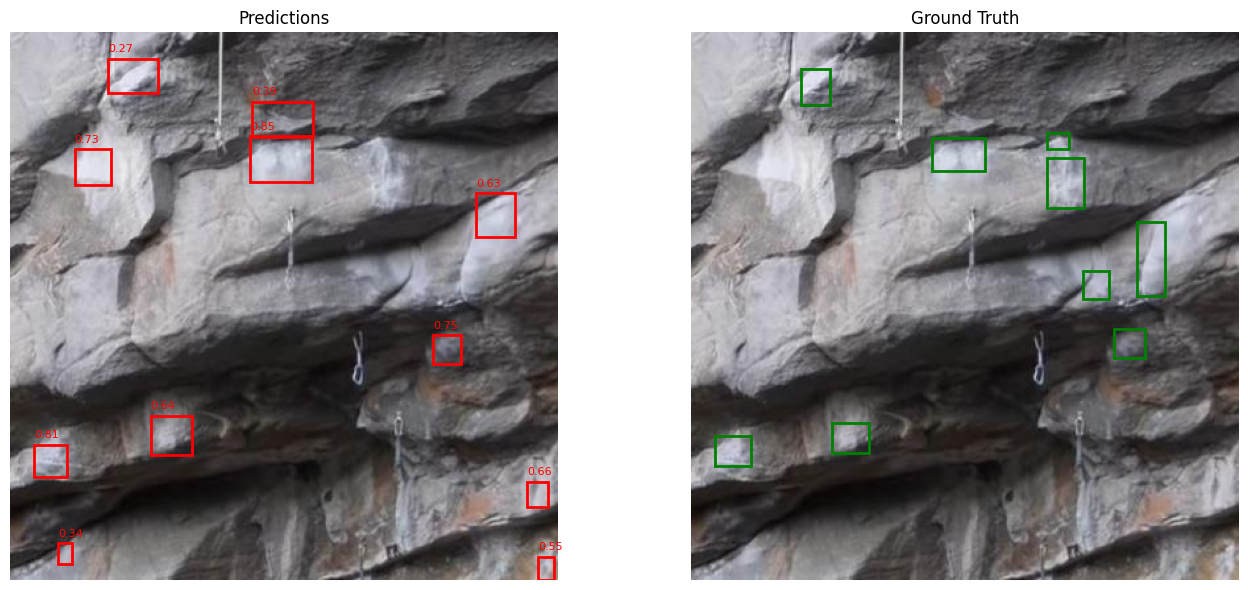

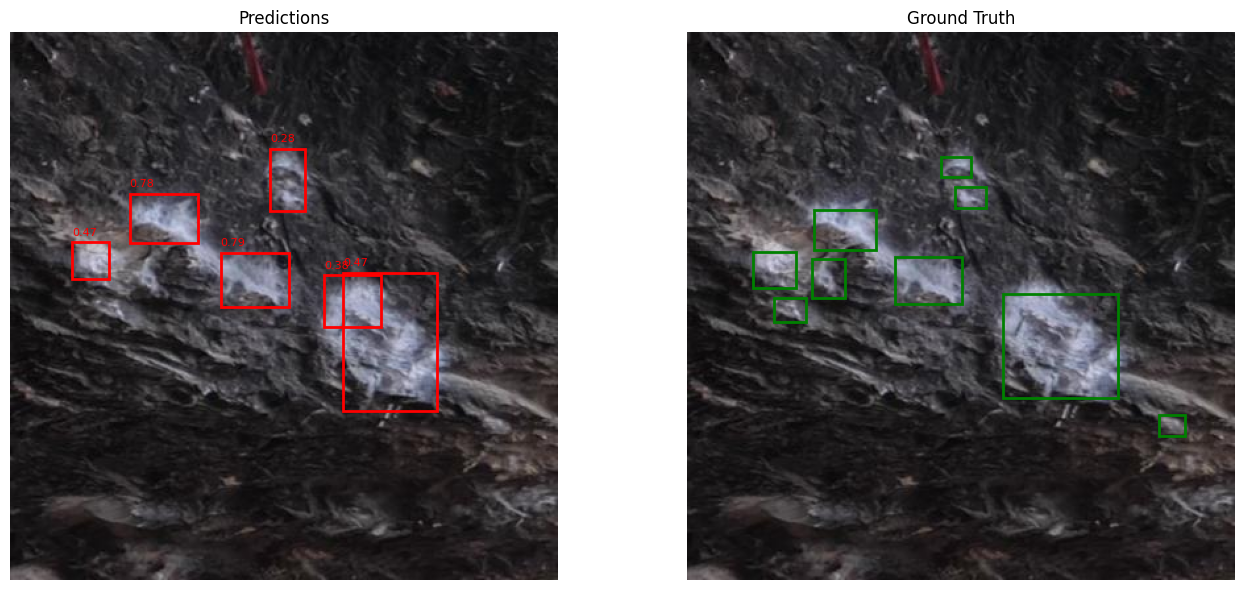

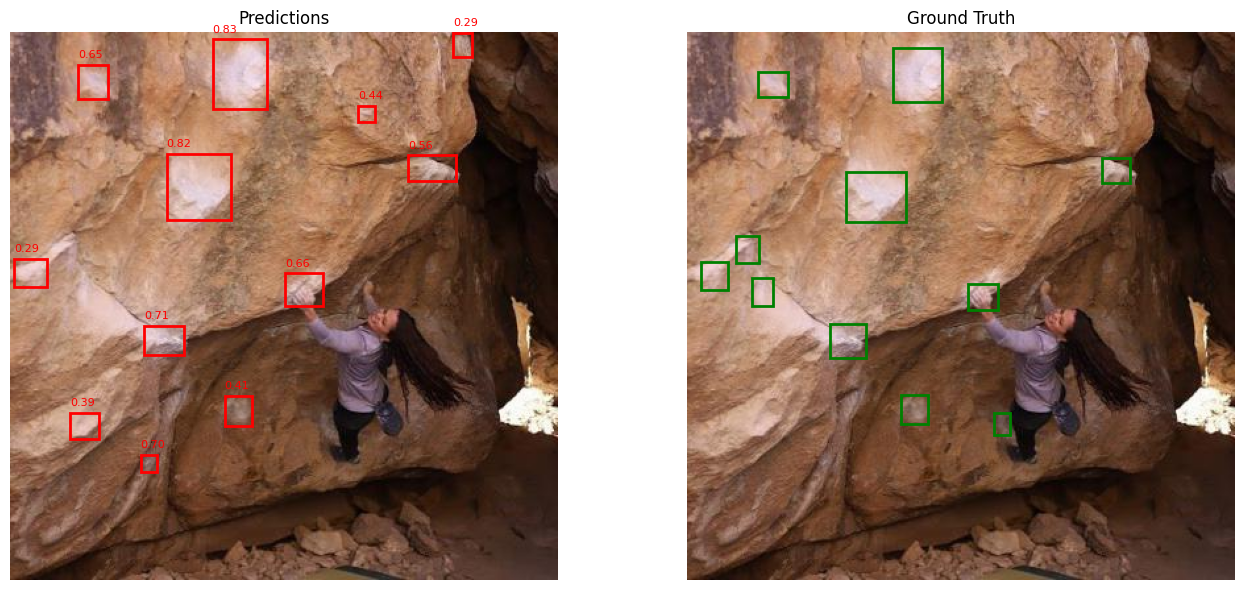

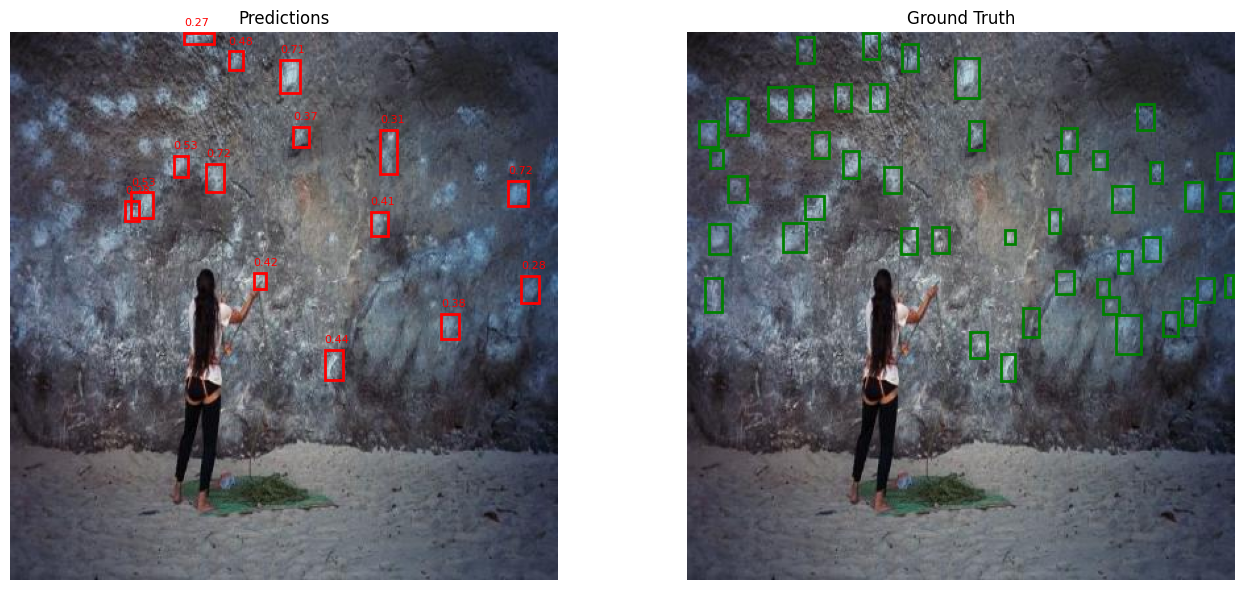

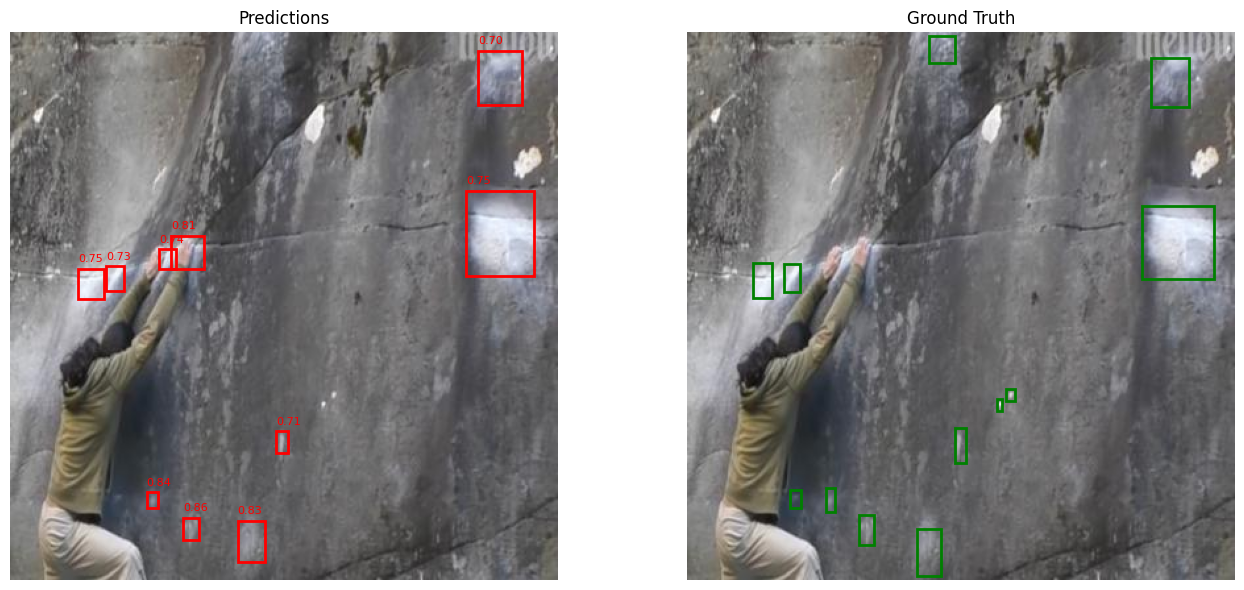

In [7]:
model_path = Path('/content/drive/MyDrive/climbing_holds_model/climbing_holds_cosine_anchor_tuned/weights/best.pt')
if not model_path.exists():
    model_path = Path('climbing_holds_model.pt')
    if not model_path.exists():
        print("Model file not found.")
        exit()

model = YOLO(model_path)

image_dir = Path('/content/drive/MyDrive/data_(1)/test/images')
label_dir = Path('/content/drive/MyDrive/data_(1)/test/labels')

test_images = list(image_dir.glob('*.jpg'))[:5]

def filter_boxes_by_confidence(results, iou_threshold=0.2):
    filtered_results = []
    for result in results:
        boxes = result.boxes.xyxy.cpu()
        confs = result.boxes.conf.cpu()
        keep = list(range(len(boxes)))
        for i in range(len(boxes)):
            for j in range(i + 1, len(boxes)):
                if i in keep and j in keep:
                    iou = box_iou(boxes[i].unsqueeze(0), boxes[j].unsqueeze(0)).item()
                    if iou >= iou_threshold:
                        if confs[i] >= confs[j]:
                            keep.remove(j)
                        else:
                            keep.remove(i)
        r = result.new()
        r.boxes = result.boxes[keep]
        filtered_results.append(r)
    return filtered_results

results = model(test_images)
filtered_results = filter_boxes_by_confidence(results)

def load_labels(label_path, img_shape):
    h, w = img_shape
    boxes = []
    if label_path.exists():
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    _, x, y, bw, bh = map(float, parts)
                    xmin = (x - bw / 2) * w
                    xmax = (x + bw / 2) * w
                    ymin = (y - bh / 2) * h
                    ymax = (y + bh / 2) * h
                    boxes.append([xmin, ymin, xmax, ymax])
    return boxes

for i, img_path in enumerate(test_images):
    img = plt.imread(img_path)
    h, w = img.shape[:2]
    label_path = label_dir / (img_path.stem + '.txt')
    gt_boxes = load_labels(label_path, (h, w))
    pred_boxes = filtered_results[i].boxes.xyxy.cpu().numpy()
    pred_confs = filtered_results[i].boxes.conf.cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].imshow(img)
    axes[0].set_title("Predictions")
    for box, conf in zip(pred_boxes, pred_confs):
        xmin, ymin, xmax, ymax = box
        axes[0].add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                        edgecolor='red', facecolor='none', linewidth=2))
        axes[0].text(xmin, ymin - 5, f"{conf:.2f}", color='red', fontsize=8)

    axes[1].imshow(img)
    axes[1].set_title("Ground Truth")
    for box in gt_boxes:
        xmin, ymin, xmax, ymax = box
        axes[1].add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                        edgecolor='green', facecolor='none', linewidth=2))

    for ax in axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()